### 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image, y_train_label),(x_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [3]:
#指定測試集與訓練資料集
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 50 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [15]:
# 把label轉成numerical categorical
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [16]:
x_Train[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [17]:
x_Test_normalize[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
y_train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
y_Test_OneHot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 建立模型

In [20]:
from keras.models import Sequential
from keras.layers import Dense

#宣告採用序列模型
model = Sequential()

#建構輸入層
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',
               activation='relu'))

In [21]:
#建構輸出層
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


### 訓練模型

In [23]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [24]:
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot, validation_split=0.2,
                         epochs=10, batch_size=32, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 367us/step - loss: 0.2698 - acc: 0.9222 - val_loss: 0.1329 - val_acc: 0.9611
Epoch 2/10
48000/48000 [==============================] - 11s 239us/step - loss: 0.1080 - acc: 0.9680 - val_loss: 0.1040 - val_acc: 0.9690
Epoch 3/10
48000/48000 [==============================] - 11s 237us/step - loss: 0.0713 - acc: 0.9786 - val_loss: 0.0942 - val_acc: 0.9720
Epoch 4/10
48000/48000 [==============================] - 11s 237us/step - loss: 0.0511 - acc: 0.9837 - val_loss: 0.0808 - val_acc: 0.9757
Epoch 5/10
48000/48000 [==============================] - 11s 234us/step - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0807 - val_acc: 0.9755
Epoch 6/10
48000/48000 [==============================] - 11s 237us/step - loss: 0.0257 - acc: 0.9917 - val_loss: 0.0790 - val_acc: 0.9775
Epoch 7/10
48000/48000 [==============================] - 12s 240us/step - loss: 0.0201 - acc: 0.9942 - val_loss: 0.

### 以圖形顯示訓練過程

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

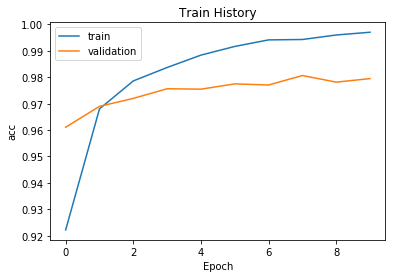

In [27]:
show_train_history(train_history, 'acc', 'val_acc')

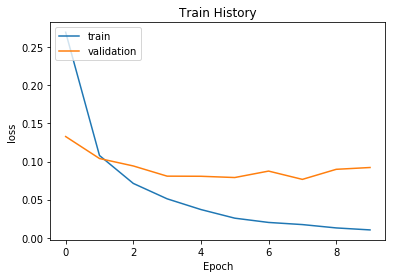

In [28]:
show_train_history(train_history, 'loss', 'val_loss')

### 評估模型準確率

In [29]:
score = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()

10000/10000 [==============================] - 1s 103us/step



In [30]:
print('accuracy=', score[1])

accuracy= 0.9796


### 作業
- 請嘗試新增一層或兩層，看看最後預測結果是否有差
        
        - model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))



In [32]:
#繼續利用上面資料，增加層次
#建構輸入層 (第一層)
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#建構輸入層 (第二層)
model.add(Dense(units=100, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\edith_lin\AppData\Local\Continuum\anaconda3\envs\keras36\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [33]:
#訓練模型
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 331us/step - loss: 0.1115 - acc: 0.9910 - val_loss: 0.1493 - val_acc: 0.9759
Epoch 2/10
48000/48000 [==============================] - 15s 307us/step - loss: 0.0330 - acc: 0.9932 - val_loss: 0.1628 - val_acc: 0.9731
Epoch 3/10
48000/48000 [==============================] - 15s 307us/step - loss: 0.0297 - acc: 0.9943 - val_loss: 0.1445 - val_acc: 0.9750
Epoch 4/10
48000/48000 [==============================] - 15s 308us/step - loss: 0.0331 - acc: 0.9939 - val_loss: 0.1354 - val_acc: 0.9753
Epoch 5/10
48000/48000 [==============================] - 15s 309us/step - loss: 0.0316 - acc: 0.9939 - val_loss: 0.1494 - val_acc: 0.9742
Epoch 6/10
48000/48000 [==============================] - 15s 308us/step - loss: 0.0298 - acc: 0.9941 - val_loss: 0.1535 - val_acc: 0.9768
Epoch 7/10
48000/48000 [==============================] - 15s 307us/step - loss: 0.0285 - acc: 0.9942 - val_loss: 0.

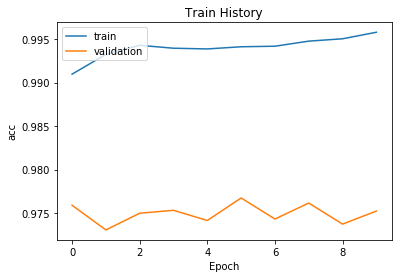

In [34]:
#以圖形顯示訓練過程
show_train_history(train_history,'acc','val_acc')

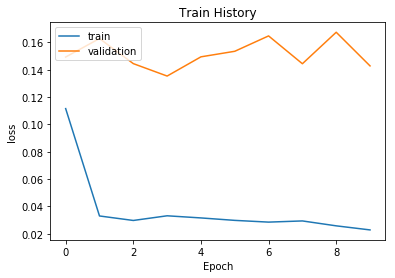

In [35]:
show_train_history(train_history,'loss','val_loss')


In [36]:
#評估模型準確率          
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 103us/step

accuracy= 0.9777
